In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.config', 'brain_stroke.csv', 'sample_data']


In [ ]:
dataset = pd.read_csv("/content/brain_stroke.csv", engine='python')

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.shape

(4981, 11)

In [ ]:
dataset.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
dataset.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2690,Male,78.0,1,1,Yes,Self-employed,Rural,106.41,27.3,never smoked,0
2627,Female,41.0,0,0,Yes,Private,Urban,78.74,42.3,smokes,0
165,Female,78.0,0,0,Yes,Self-employed,Rural,109.47,30.8,never smoked,1
3378,Female,40.0,1,0,Yes,Private,Rural,81.59,27.2,never smoked,0
1808,Male,58.0,0,0,Yes,Private,Rural,135.89,23.1,formerly smoked,0


In [ ]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
# Replace this with descriptions matching the brain stroke dataset
info = [
    "Age of the patient",
    "Gender of the patient",
    "Whether the patient has hypertension",
    "Whether the patient has heart disease",
    "Marital status",
    "Type of work",
    "Residence type",
    "Average glucose level",
    "Body mass index",
    "Whether the patient has had a stroke"
]

# Display column names with descriptions
for i in range(len(info)):
    print(dataset.columns[i] + ":\t\t" + info[i])


gender:		Age of the patient
age:		Gender of the patient
hypertension:		Whether the patient has hypertension
heart_disease:		Whether the patient has heart disease
ever_married:		Marital status
work_type:		Type of work
Residence_type:		Residence type
avg_glucose_level:		Average glucose level
bmi:		Body mass index
smoking_status:		Whether the patient has had a stroke


In [ ]:
print(dataset.columns)
dataset['stroke'].describe()
dataset[dataset.columns[dataset.columns.str.contains('stroke')]].describe()


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


,stroke
count,4981.000000
mean,0.049789
std,0.217531
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
dataset["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'smoking_status' column (or any other categorical column)
dataset['smoking_status_encoded'] = label_encoder.fit_transform(dataset['smoking_status'])

# Print the first few rows to check the changes
print(dataset.head())

# Optionally, you can view the mapping
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping: ", label_mapping)


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             105.92  32.5     never smoked       1   
2          Urban             171.23  34.4           smokes       1   
3          Rural             174.12  24.0     never smoked       1   
4          Urban             186.21  29.0  formerly smoked       1   

   smoking_status_encoded  
0                       1  
1                       2  
2                       3  
3         

In [ ]:
# Convert 'stroke' column to numeric type
dataset['stroke'] = pd.to_numeric(dataset['stroke'], errors='coerce')

# Select only numerical columns for correlation calculation
numerical_columns = dataset.select_dtypes(include=np.number).columns

# Print the correlation of numerical columns with the 'stroke' column
print(dataset[numerical_columns].corr()["stroke"].abs().sort_values(ascending=False))

stroke                    1.000000
age                       0.246478
heart_disease             0.134610
avg_glucose_level         0.133227
hypertension              0.131965
bmi                       0.056926
smoking_status_encoded    0.027463
Name: stroke, dtype: float64


stroke
0    4733
1     248
Name: count, dtype: int64


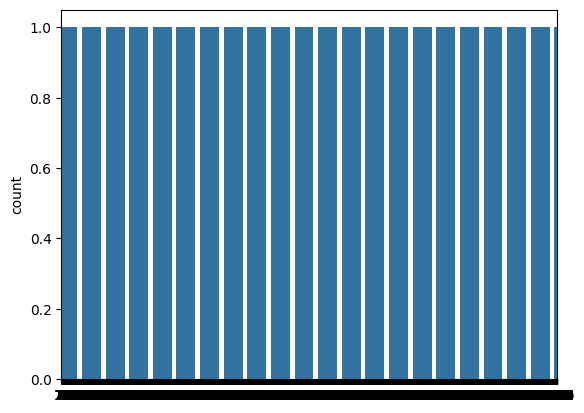

In [ ]:

# Set target variable to 'stroke' column
y = dataset["stroke"]
# Print the value counts for the 'stroke' column
stroke_temp = dataset.stroke.value_counts()
print(stroke_temp)
# Plot the count of each class in the 'stroke' column
sns.countplot(y)
plt.show()


In [ ]:
# Get the total number of rows
total_records = len(dataset)

# Count the occurrences of each stroke label (0 = no stroke, 1 = stroke)
stroke_counts = dataset['stroke'].value_counts()

# Calculate and print the percentage of each stroke outcome
for stroke, count in stroke_counts.items():
    print(f"Percentage of {'Stroke' if stroke == 1 else 'No Stroke'}: {round(count * 100 / total_records, 2)}%")


Percentage of No Stroke: 95.02%
Percentage of Stroke: 4.98%


In [ ]:
# Get the unique values in the 'stroke' column
dataset["avg_glucose_level"].unique()


array([228.69, 105.92, 171.23, ..., 191.15,  95.02,  83.94])

<Axes: xlabel='avg_glucose_level', ylabel='stroke'>

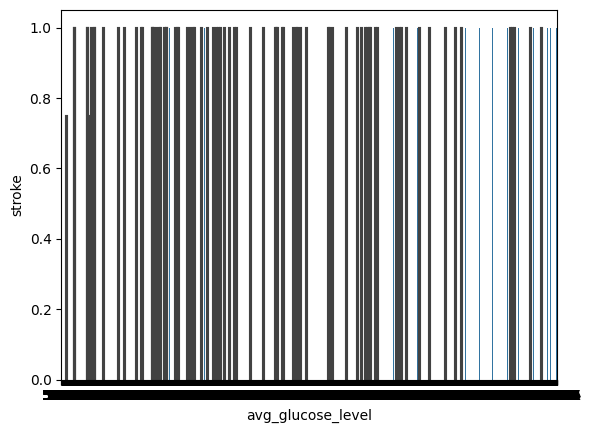

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the bar plot: Nitrogen content (N) vs Crop types (label)
sns.barplot(x=dataset["avg_glucose_level"], y=dataset["stroke"])



In [ ]:
dataset["bmi"].unique()

array([36.6, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8, 27.3,
       28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5, 28.3,
       44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9, 28.5,
       26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8, 40.4,
       25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. , 24.1,
       45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2, 29.4,
       24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 27.1, 31.3, 31. ,
       31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8, 21.8, 27.5,
       24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2, 23.6, 22.3,
       37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. , 42.5, 35.5,
       26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. , 28.6, 42.2,
       29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4, 40.5, 36.7,
       29.3, 19.6, 18. , 17.6, 17.7, 35. , 22. , 39.4, 19.7, 22.5, 25.2,
       41.8, 23.7, 24.5, 31.2, 16. , 31.6, 25.1, 24

<Axes: xlabel='bmi', ylabel='stroke'>

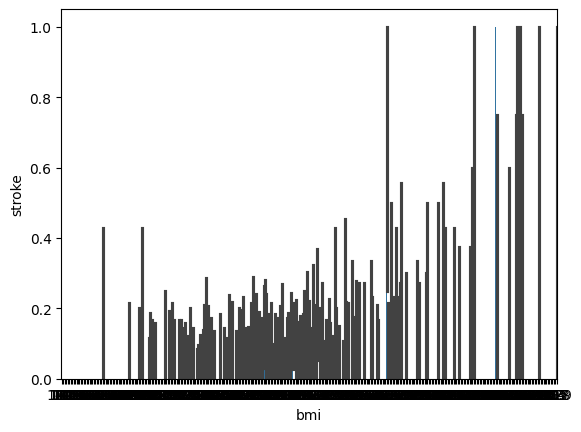

In [ ]:
sns.barplot(x=dataset["bmi"],y=dataset["stroke"])

In [ ]:
dataset["age"].unique()


array([6.70e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01, 7.40e+01,
       6.90e+01, 7.80e+01, 6.10e+01, 5.40e+01, 5.00e+01, 6.40e+01,
       7.50e+01, 6.00e+01, 7.10e+01, 5.20e+01, 8.20e+01, 6.50e+01,
       5.70e+01, 4.20e+01, 4.80e+01, 7.20e+01, 5.80e+01, 7.60e+01,
       3.90e+01, 7.70e+01, 6.30e+01, 7.30e+01, 5.60e+01, 4.50e+01,
       7.00e+01, 5.90e+01, 6.60e+01, 4.30e+01, 6.80e+01, 4.70e+01,
       5.30e+01, 3.80e+01, 5.50e+01, 4.60e+01, 3.20e+01, 5.10e+01,
       1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01, 3.50e+01,
       2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01, 1.70e+01,
       1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01, 2.90e+01,
       1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01, 3.60e+01,
       6.40e-01, 3.40e+01, 4.10e+01, 8.80e-01, 5.00e+00, 2.60e+01,
       3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00, 9.00e+00,
       1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01, 1.08e+00,
       1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e+00, 1.72e

<Axes: xlabel='age', ylabel='stroke'>

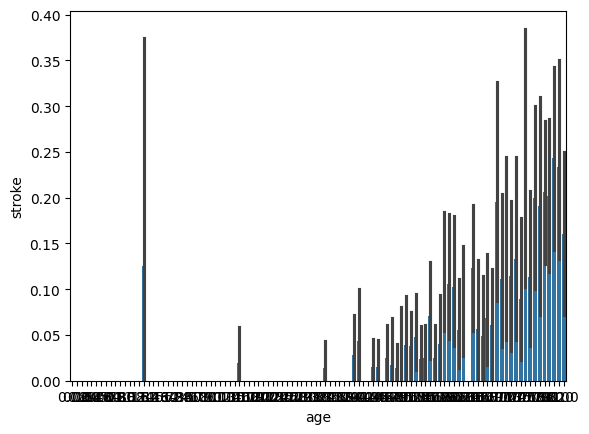

In [ ]:
sns.barplot(x=dataset["age"],y=dataset["stroke"])

<Axes: xlabel='age', ylabel='Density'>

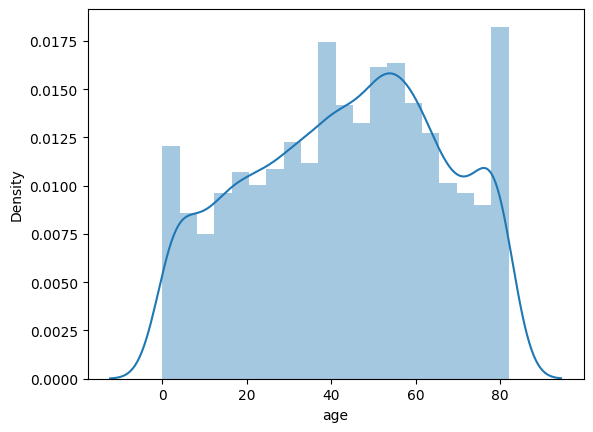

In [ ]:
sns.distplot(dataset["age"])

In [ ]:
dataset["hypertension"].unique()

array([0, 1])

<Axes: xlabel='hypertension', ylabel='stroke'>

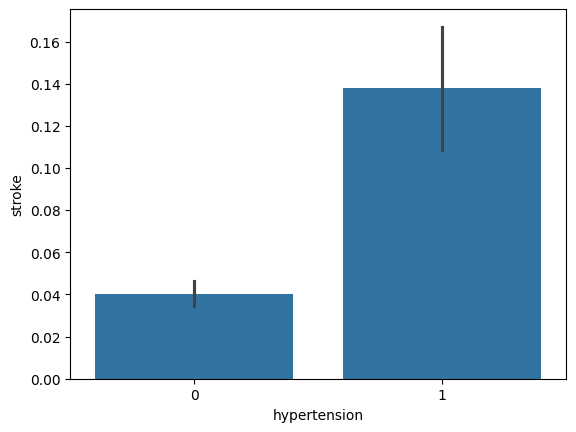

In [ ]:
sns.barplot(x=dataset["hypertension"],y=dataset["stroke"])

<Axes: xlabel='hypertension', ylabel='Density'>

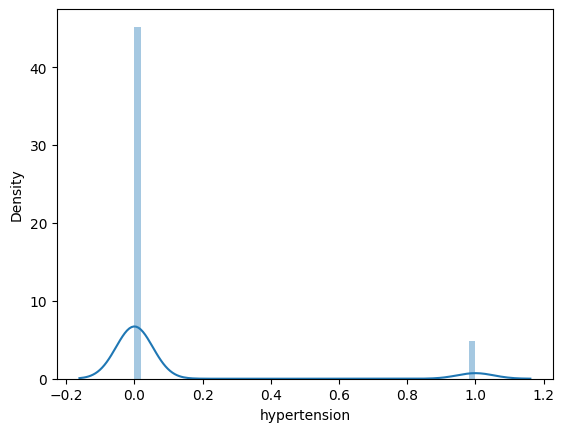

In [ ]:
sns.distplot(dataset["hypertension"])

In [ ]:
dataset["heart_disease"].unique()

array([1, 0])

<Axes: xlabel='heart_disease', ylabel='stroke'>

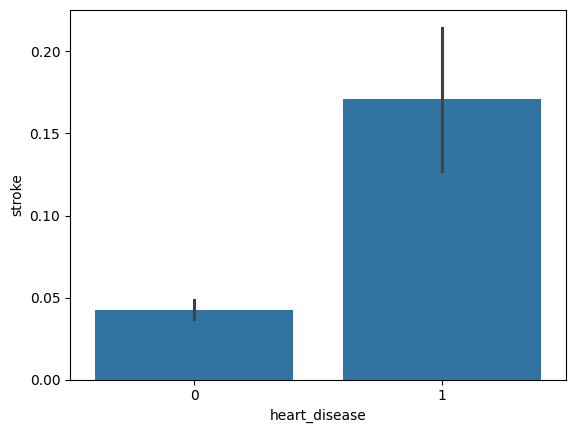

In [ ]:
sns.barplot(x=dataset["heart_disease"],y=dataset["stroke"])

<Axes: xlabel='heart_disease', ylabel='Density'>

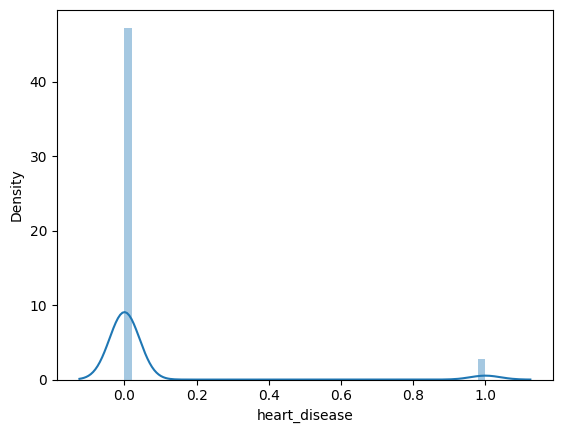

In [ ]:
sns.distplot(dataset["heart_disease"])

In [ ]:
from sklearn.model_selection import train_test_split
predictors = dataset.drop("stroke",axis=1)
label = dataset["stroke"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,label,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(3984, 11)

In [ ]:
X_test.shape

(997, 11)

In [ ]:
Y_train.shape

(3984,)

In [ ]:
Y_test.shape

(997,)

Model Fitting


In [ ]:
from sklearn.metrics import accuracy_score

Logistic Regression

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming X_train is your DataFrame
for column in X_train.select_dtypes(include=['object']).columns:
    # Create a LabelEncoder for each categorical column
    le = LabelEncoder()
    # Fit and transform the column in both training and testing data
    X_train[column] = le.fit_transform(X_train[column])

    # Check if the column exists in X_test before transforming
    if column in X_test.columns:
        X_test[column] = le.transform(X_test[column])


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)


In [ ]:
Y_pred_lr.shape

(997,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 94.98 %



Model: Logistic Regression
Accuracy: 0.9458
Precision: 0.8946
Recall: 0.9458
F1-Score: 0.9195

Confusion Matrix:
[[943   0]
 [ 54   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



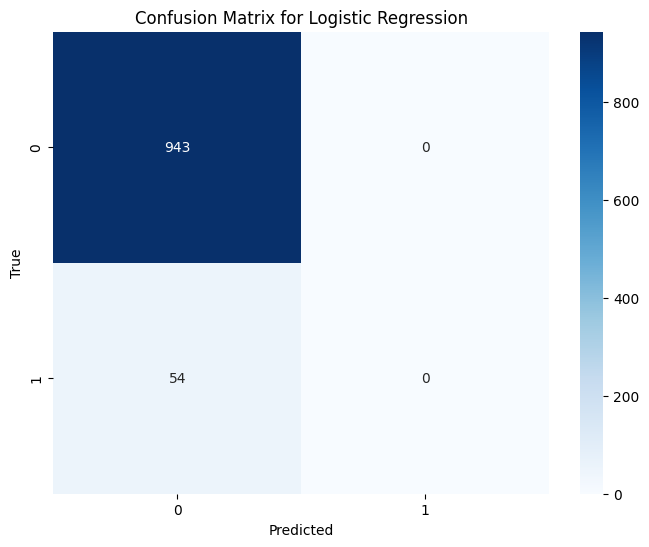

In [ ]:
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named 'your_data.csv'
data = pd.read_csv('/content/brain_stroke.csv')

# Separate features (X) and target (y)
X = data.drop('stroke', axis=1)  # Replace 'target_column_name' with your target column
y = data['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Preprocessing: Label Encoding for categorical features
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    if column in X_test.columns:
        X_test[column] = le.transform(X_test[column])

# Model training: Logistic Regression
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print metrics
print("\nModel: Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Visualize confusion matrix colorfully
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

In [ ]:
Y_pred_nb.shape

(997,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 86.56 %



Model: Navie Bayes
Accuracy: 0.8606
Precision: 0.9279
Recall: 0.8606
F1-Score: 0.8883

Confusion Matrix:
[[830 113]
 [ 26  28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       943
           1       0.20      0.52      0.29        54

    accuracy                           0.86       997
   macro avg       0.58      0.70      0.60       997
weighted avg       0.93      0.86      0.89       997



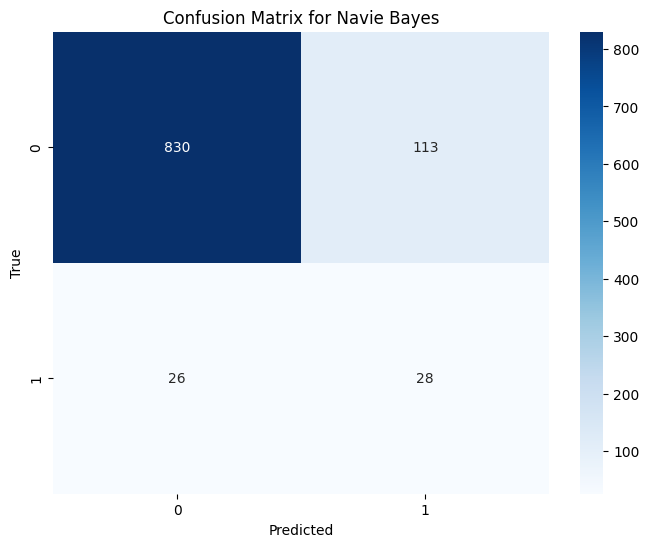

In [ ]:
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named 'your_data.csv'
data = pd.read_csv('/content/brain_stroke.csv')

# Separate features (X) and target (y)
X = data.drop('stroke', axis=1)  # Replace 'target_column_name' with your target column
y = data['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Preprocessing: Label Encoding for categorical features
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    if column in X_test.columns:
        X_test[column] = le.transform(X_test[column])

# Model training:
model = GaussianNB()  # Increase max_iter if needed
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print metrics
print("\nModel: Navie Bayes")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Visualize confusion matrix colorfully
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Navie Bayes')
plt.show()

SVM


In [ ]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape


(997,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")


The accuracy score achieved using Linear SVM is: 94.98 %



Model: SVM
Accuracy: 0.9458
Precision: 0.8946
Recall: 0.9458
F1-Score: 0.9195

Confusion Matrix:
[[943   0]
 [ 54   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



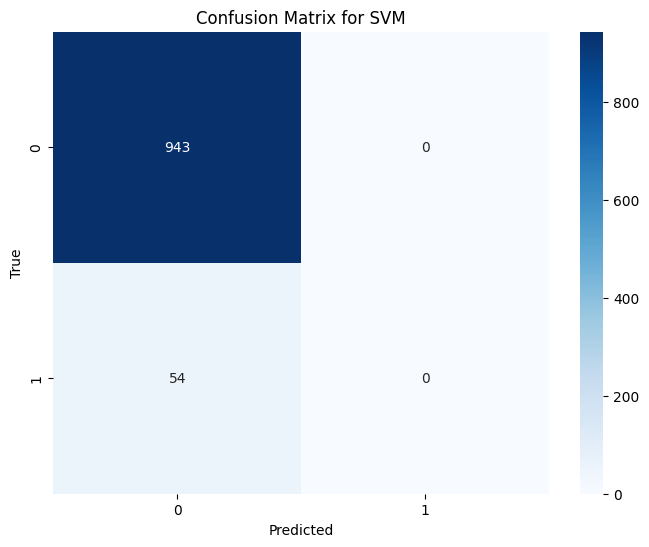

In [ ]:
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named 'your_data.csv'
data = pd.read_csv('/content/brain_stroke.csv')

# Separate features (X) and target (y)
X = data.drop('stroke', axis=1)  # Replace 'target_column_name' with your target column
y = data['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Preprocessing: Label Encoding for categorical features
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    if column in X_test.columns:
        X_test[column] = le.transform(X_test[column])

# Model training:
model = SVC(kernel='linear') # Increase max_iter if needed
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print metrics
print("\nModel: SVC")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Visualize confusion matrix colorfully
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()

K Nearest Neighbors


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

(997,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 94.68 %



Model: KNN
Accuracy: 0.9418
Precision: 0.9043
Recall: 0.9418
F1-Score: 0.9193

Confusion Matrix:
[[938   5]
 [ 53   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       943
           1       0.17      0.02      0.03        54

    accuracy                           0.94       997
   macro avg       0.56      0.51      0.50       997
weighted avg       0.90      0.94      0.92       997



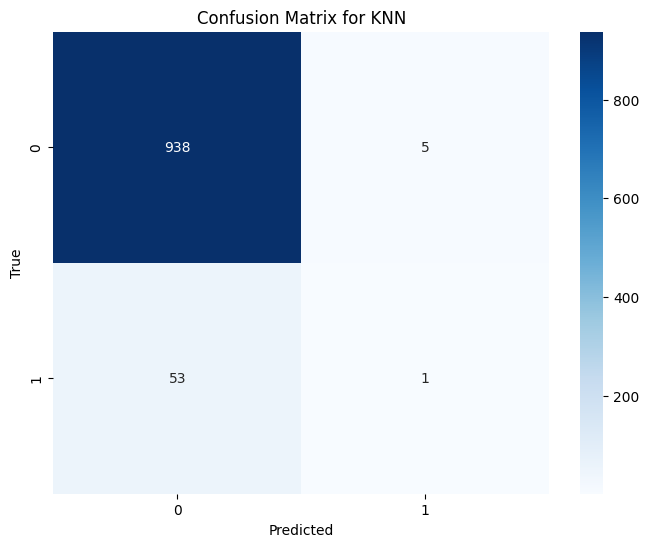

In [ ]:
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named 'your_data.csv'
data = pd.read_csv('/content/brain_stroke.csv')

# Separate features (X) and target (y)
X = data.drop('stroke', axis=1)  # Replace 'target_column_name' with your target column
y = data['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Preprocessing: Label Encoding for categorical features
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    if column in X_test.columns:
        X_test[column] = le.transform(X_test[column])

# Model training:
model = KNeighborsClassifier(n_neighbors=5)  # Create a KNN classifier with k=5
# You can experiment with different values of k
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print metrics
print("\nModel: KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Visualize confusion matrix colorfully
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
for x in range(200):
      dt = DecisionTreeClassifier(random_state=x)
      dt.fit(X_train,Y_train)
      Y_pred_dt = dt.predict(X_test)
      current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
      if(current_accuracy>max_accuracy):
          max_accuracy = current_accuracy
          best_x = x
 #print(max_accuracy)
 #print(best_x)
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)

(997,)


In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 91.47 %



Model: Decision Tree
Accuracy: 0.9218
Precision: 0.9145
Recall: 0.9218
F1-Score: 0.9180

Confusion Matrix:
[[909  34]
 [ 44  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       943
           1       0.23      0.19      0.20        54

    accuracy                           0.92       997
   macro avg       0.59      0.57      0.58       997
weighted avg       0.91      0.92      0.92       997



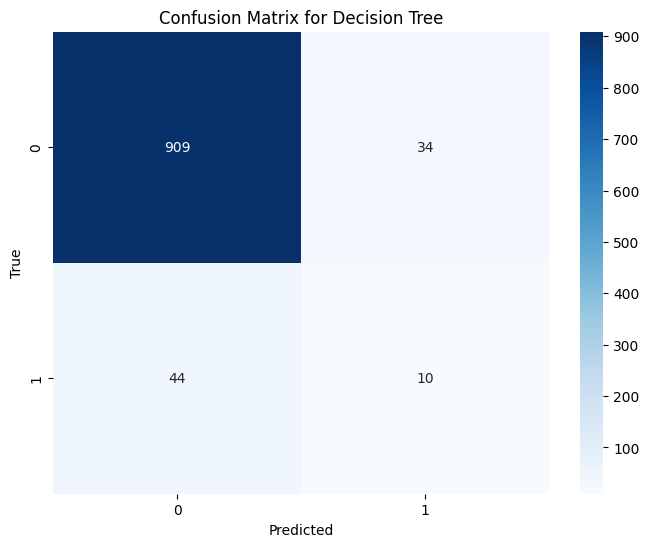

In [ ]:
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named 'your_data.csv'
data = pd.read_csv('/content/brain_stroke.csv')

# Separate features (X) and target (y)
X = data.drop('stroke', axis=1)  # Replace 'target_column_name' with your target column
y = data['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Preprocessing: Label Encoding for categorical features
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    if column in X_test.columns:
        X_test[column] = le.transform(X_test[column])

# Model training:
model =  DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print metrics
print("\nModel: Decision Tree")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Visualize confusion matrix colorfully
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0
best_x = 0  # Initialize best_x

# Iterating over random_state values
for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train, Y_train)

    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_test, Y_pred_rf) * 100, 2)

    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

# Train the RandomForestClassifier with the best random_state
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(997,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 94.98 %



Model: Random Forest
Accuracy: 0.9438
Precision: 0.8945
Recall: 0.9438
F1-Score: 0.9185

Confusion Matrix:
[[941   2]
 [ 54   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.94      0.92       997



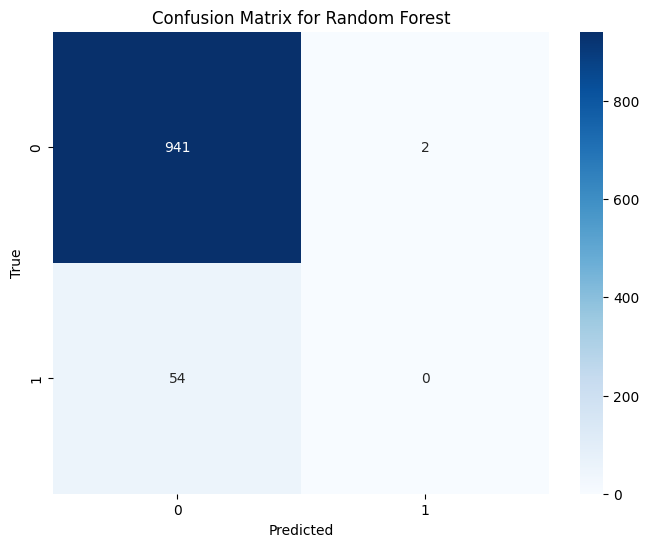

In [ ]:
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named 'your_data.csv'
data = pd.read_csv('/content/brain_stroke.csv')

# Separate features (X) and target (y)
X = data.drop('stroke', axis=1)  # Replace 'target_column_name' with your target column
y = data['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Preprocessing: Label Encoding for categorical features
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    if column in X_test.columns:
        X_test[column] = le.transform(X_test[column])

# Model training:
model = RandomForestClassifier(n_estimators=100)  # Create a Random Forest classifier with 100 trees
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print metrics
print("\nModel: Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Visualize confusion matrix colorfully
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()

XG Boost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

(997,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 94.38 %



Model: XG Boost
Accuracy: 0.9388
Precision: 0.9093
Recall: 0.9388
F1-Score: 0.9207

Confusion Matrix:
[[933  10]
 [ 51   3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       943
           1       0.23      0.06      0.09        54

    accuracy                           0.94       997
   macro avg       0.59      0.52      0.53       997
weighted avg       0.91      0.94      0.92       997



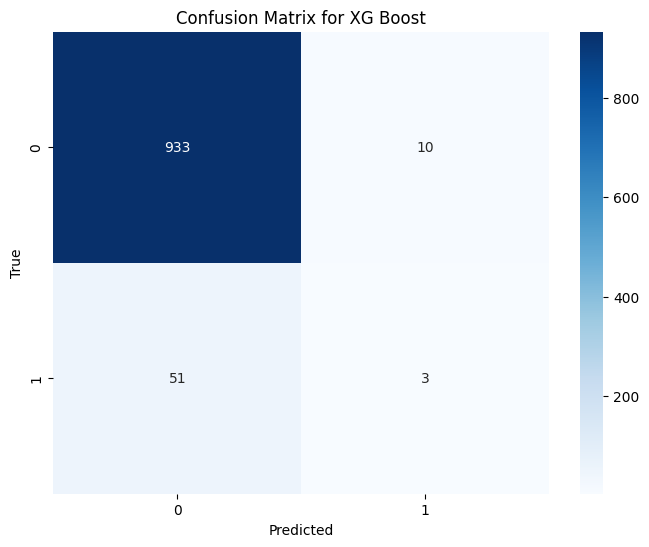

In [ ]:
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named 'your_data.csv'
data = pd.read_csv('/content/brain_stroke.csv')

# Separate features (X) and target (y)
X = data.drop('stroke', axis=1)  # Replace 'target_column_name' with your target column
y = data['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Preprocessing: Label Encoding for categorical features
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    if column in X_test.columns:
        X_test[column] = le.transform(X_test[column])

# Model training:
model =XGBClassifier()  # Create a Random Forest classifier with 100 trees
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print metrics
print("\nModel: XG Boost")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Visualize confusion matrix colorfully
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XG Boost')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting
model = Sequential()
# Changed input_dim to match X_train's shape if it has 11 features
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8274 - loss: 1.0848
Epoch 2/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9378 - loss: 0.2557
Epoch 3/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9460 - loss: 0.2277
Epoch 4/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9407 - loss: 0.2222
Epoch 5/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9485 - loss: 0.1921
Epoch 6/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9469 - loss: 0.2056
Epoch 7/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9549 - loss: 0.1760
Epoch 8/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9481 - loss: 0.1942
Epoch 9/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9486 - loss: 0.1916
Epoch 10/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9512 - loss: 0.1871
Epoch 11/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9487 - loss: 0.1835
Epoch 12/300
125/125 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
Y_pred_nn = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
Y_pred_nn.shape

(997, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)
print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 94.98 %


In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 94.98 %
The accuracy score achieved using Naive Bayes is: 86.56 %
The accuracy score achieved using Support Vector Machine is: 94.98 %
The accuracy score achieved using K-Nearest Neighbors is: 94.68 %
The accuracy score achieved using Decision Tree is: 91.47 %
The accuracy score achieved using Random Forest is: 94.98 %
The accuracy score achieved using XGBoost is: 94.38 %
The accuracy score achieved using Neural Network is: 94.98 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

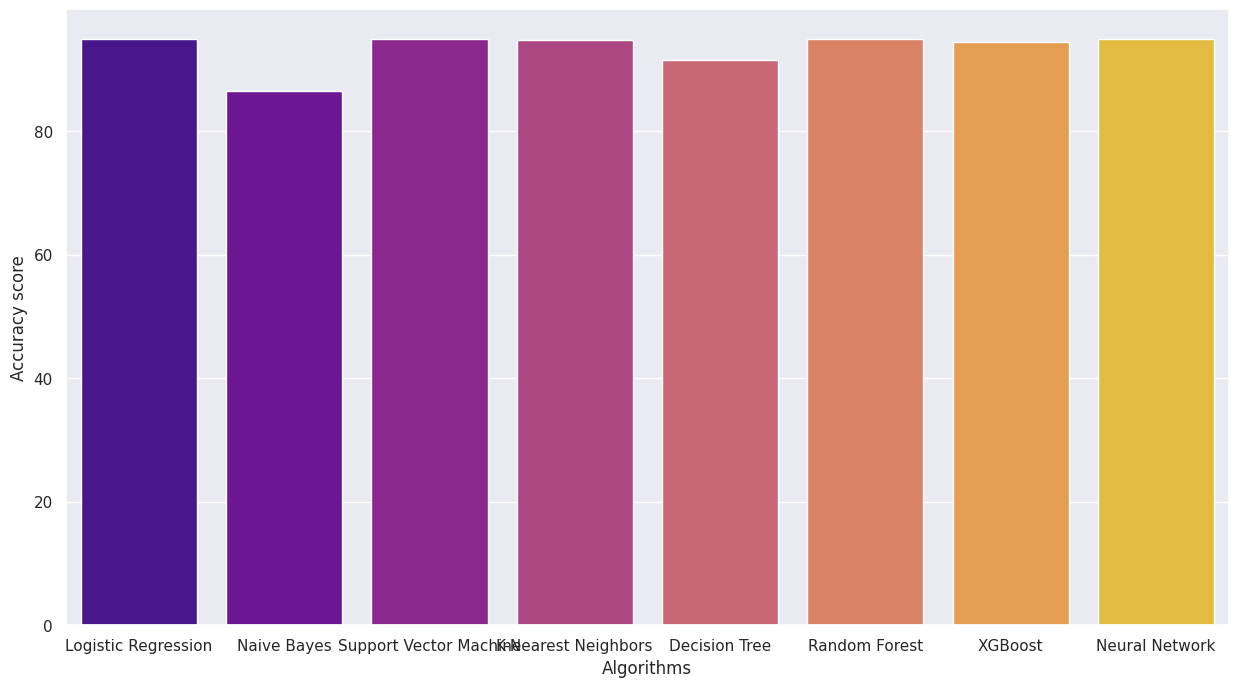

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms,y=scores,palette='plasma')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "/content/brain_stroke.csv"
data = pd.read_csv(file_path)

# Encode categorical features
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded = data.copy()

for col in categorical_cols:
    encoder = LabelEncoder()
    data_encoded[col] = encoder.fit_transform(data[col])

# Separate features and target
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Scale numerical features
scaler = StandardScaler()
X[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X[['age', 'avg_glucose_level', 'bmi']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate individual models
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Create and train the hybrid Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('logistic', logistic_model),
    ('rf', rf_model)
], voting='hard')

voting_clf.fit(X_train, y_train)

# Make predictions with the hybrid model
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the hybrid model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Hybrid Model (Voting Classifier) Accuracy: {accuracy_voting * 100:.2f}%")


Logistic Regression Accuracy: 94.98%
Random Forest Accuracy: 94.88%
Hybrid Model (Voting Classifier) Accuracy: 94.98%


Logistic Regression Accuracy: 94.98%
Random Forest Accuracy: 94.88%
Hybrid Model (Voting Classifier) Accuracy: 94.98%


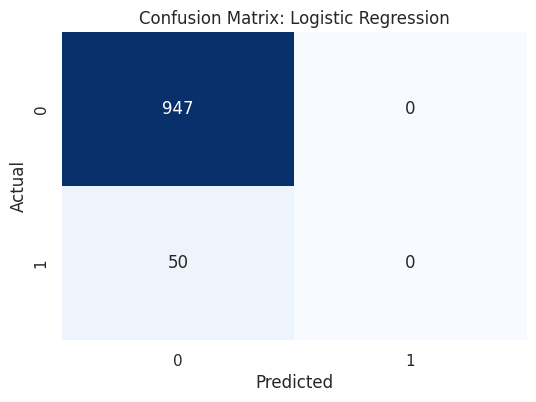

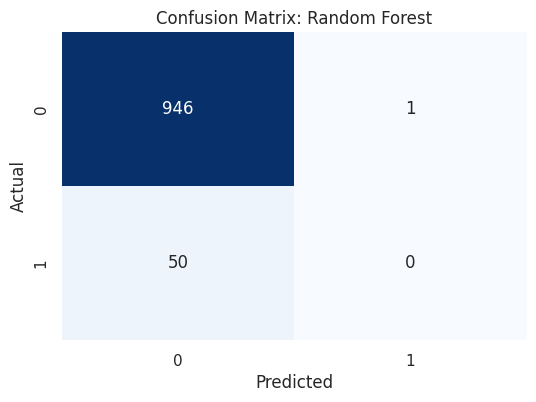

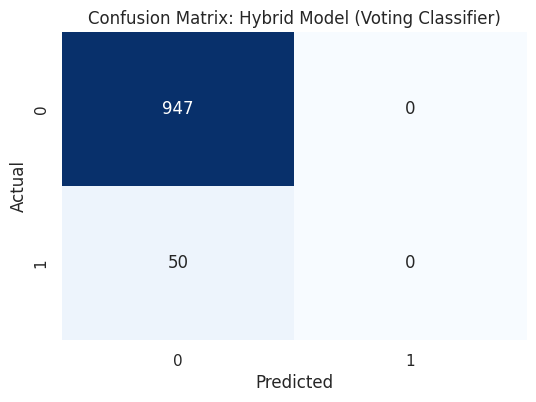

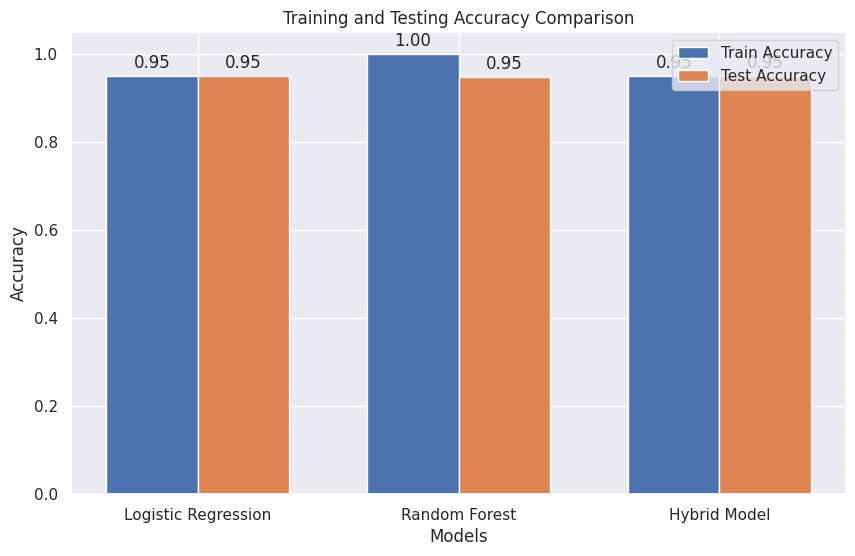

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
file_path = "/content/brain_stroke.csv"
data = pd.read_csv(file_path)

# Encode categorical features
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded = data.copy()

for col in categorical_cols:
    encoder = LabelEncoder()
    data_encoded[col] = encoder.fit_transform(data[col])

# Separate features and target
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Scale numerical features
scaler = StandardScaler()
X[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X[['age', 'avg_glucose_level', 'bmi']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Create and train the hybrid Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('logistic', logistic_model),
    ('rf', rf_model)
], voting='hard')
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_voting = voting_clf.predict(X_test)

# Evaluate individual and hybrid models' accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print(f"Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(f"Hybrid Model (Voting Classifier) Accuracy: {accuracy_voting * 100:.2f}%")

# Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {title}')
    plt.show()

plot_confusion_matrix(y_test, y_pred_logistic, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_voting, "Hybrid Model (Voting Classifier)")

# Training and Testing Accuracy Graphs
models = ['Logistic Regression', 'Random Forest', 'Hybrid Model']
train_accuracies = [
    logistic_model.score(X_train, y_train),
    rf_model.score(X_train, y_train),
    voting_clf.score(X_train, y_train)
]
test_accuracies = [accuracy_logistic, accuracy_rf, accuracy_voting]

x = np.arange(len(models))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_accuracies, width, label='Train Accuracy')
bars2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add accuracy labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.show()


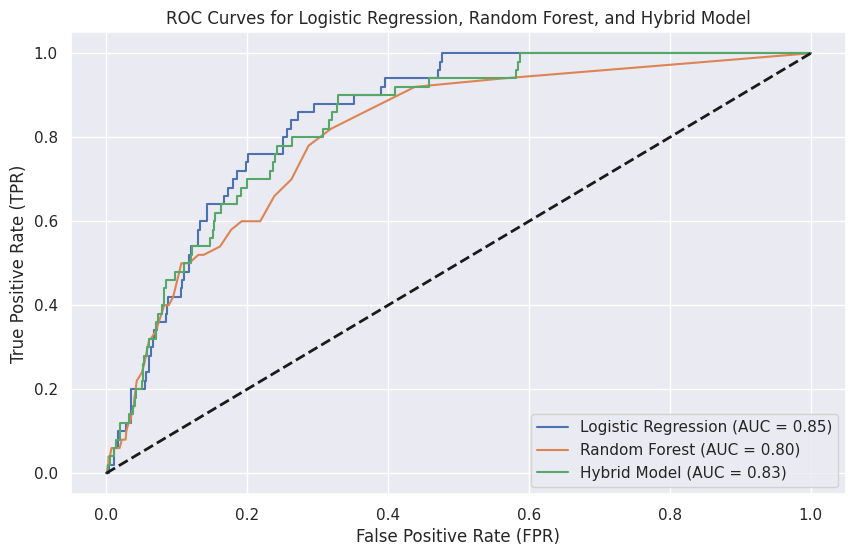

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Load the dataset
file_path = "/content/brain_stroke.csv"
data = pd.read_csv(file_path)

# Encode categorical features
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded = data.copy()

for col in categorical_cols:
    encoder = LabelEncoder()
    data_encoded[col] = encoder.fit_transform(data[col])

# Separate features and target
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

# Scale numerical features
scaler = StandardScaler()
X[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X[['age', 'avg_glucose_level', 'bmi']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Create and train the hybrid Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('logistic', logistic_model),
    ('rf', rf_model)
], voting='soft')  # Soft voting for ROC AUC
voting_clf.fit(X_train, y_train)

# Predict probabilities for ROC AUC
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_prob_voting = voting_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)
auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_voting, tpr_voting, _ = roc_curve(y_test, y_prob_voting)
auc_voting = auc(fpr_voting, tpr_voting)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {auc_logistic:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_voting, tpr_voting, label=f'Hybrid Model (AUC = {auc_voting:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Customize the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Logistic Regression, Random Forest, and Hybrid Model')
plt.legend(loc='lower right')
plt.show()
